# Lunar Lander: Python + Math = Simulation

## 1. Constructing the lander

Let's build a lunar lander that has limited fuel, and try to land on the moon without crashing.

Here is a sample plot of a lander's altitude over time... this flight didn't go so well:

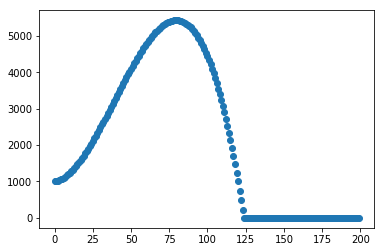

For starters, define a **python class** for a lunar lander that includes **instance variables** for mass and fuel:

In [1]:
class LunarLander:                   # the class name is LunarLander
    def __init__(self, mass, fuel):  # __init__ gets called whenever we create a new instance of a class
        self.mass = mass             # ...the 'self' keyword means 'this instance of this class'
        self.fuel = fuel             # ...python requires 'self' for instance variables

So far, a lunar lander doesn't do anything, but we can make one if we want to:

In [2]:
# here is a useless lunar lander. it does nothing.

useless_lander = LunarLander(120,10) # creating an instance of LunarLander requires mass & fuel
print(useless_lander.mass, useless_lander.fuel)

120 10


Let's add **instance variables** to represent the lander's velocity and altitude, and a **class variable** for acceleration due to gravity:

In [3]:
class LunarLander:                   
    
    g = 2.0                          # the class variable 'g' is shared among all instances
    
    def __init__(self, mass, fuel):
        self.mass = mass          
        self.fuel = fuel     
        self.altitude = 0.0          # altitude is specific to an instance, and has an initial value 
        self.velocity = 0.0          # ...and so does velocity

Here is an instance of a new & improved lunar lander:

In [4]:
# this lunar lander shows the difference between class and instance variables.

new_lander = LunarLander(150,20)
print (new_lander.mass, new_lander.fuel, new_lander.altitude, new_lander.velocity) # instance variables
print (LunarLander.g) # class variable... shared among all instances

150 20 0.0 0.0
2.0


Any function can provide **default values**, which are used whenever a parameter is not specified:

In [5]:
class LunarLander:                   
    
    g = 2.0

    # default values will be used whenever a value is not specified...
    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity

Now we can make lots of landers:

In [6]:
heavy_lander = LunarLander(mass=200)          # specifies only mass; other parameters equal default values
high_lander = LunarLander(altitude=1000)      # specifies only altitude...
goofy_lander = LunarLander(1,2,3,4)           # unlabeled values are applied in order...
test_lander = LunarLander(1,2,velocity=999)   # you can mix ordered & labeled values

print ('heavy', heavy_lander.mass, heavy_lander.fuel, heavy_lander.altitude, heavy_lander.velocity)
print ('high', high_lander.mass, high_lander.fuel, high_lander.altitude, high_lander.velocity)
print ('goofy', goofy_lander.mass, goofy_lander.fuel, goofy_lander.altitude, goofy_lander.velocity)
print ('test', test_lander.mass, test_lander.fuel, test_lander.altitude, test_lander.velocity)

heavy 200 10.0 0.0 0.0
high 120.0 10.0 1000 0.0
goofy 1 2 3 4
test 1 2 0.0 999


For our simulation, add a function called **tick** that represents one tick of the time clock (in this case, one second); every time the clock ticks, update the velocity and altitude:

In [7]:
class LunarLander:                   
    
    g = 2.0

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    # advances the simulation one second in time (one 'tick of the clock')
    def tick(self):
        self.velocity -= LunarLander.g     # increase (downward) velocity by the acceleration of gravity;
                                           # notice that 'g' belongs to the class LunarLander while 'velocity'
                                           # belongs to each instance, so it's LunarLander.g and self.velocity
                
        self.altitude += self.velocity     # change altitude
        if (self.altitude < 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:   # if landing velocity exceeds 2 m/s, you crashed!
                self.destroyed = True
            self.velocity = 0.0

Let's destroy a perfectly good lander by creating it at an altitude of 1,000 meters, even though it doesn't have any engines yet:

In [8]:
my_lander = LunarLander(altitude=1000)
while not my_lander.destroyed:                                          # run while the lander is not destroyed
    print(my_lander.altitude, my_lander.velocity, my_lander.destroyed)  # print an update
    my_lander.tick()                                                    # advance time by 1 second
print(my_lander.altitude, my_lander.velocity, my_lander.destroyed)      # print final (unfortunate) status

1000 0.0 False
998.0 -2.0 False
994.0 -4.0 False
988.0 -6.0 False
980.0 -8.0 False
970.0 -10.0 False
958.0 -12.0 False
944.0 -14.0 False
928.0 -16.0 False
910.0 -18.0 False
890.0 -20.0 False
868.0 -22.0 False
844.0 -24.0 False
818.0 -26.0 False
790.0 -28.0 False
760.0 -30.0 False
728.0 -32.0 False
694.0 -34.0 False
658.0 -36.0 False
620.0 -38.0 False
580.0 -40.0 False
538.0 -42.0 False
494.0 -44.0 False
448.0 -46.0 False
400.0 -48.0 False
350.0 -50.0 False
298.0 -52.0 False
244.0 -54.0 False
188.0 -56.0 False
130.0 -58.0 False
70.0 -60.0 False
8.0 -62.0 False
0.0 0.0 True


It's not so easy to look at a table of number and understand what's going on... let's change tick() to return the altitude after each one-second time step, so we can look at a graph instead.

Here is the code to create the return value:

In [9]:
class LunarLander:                   
    
    g = 2.0

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    def tick(self):
        self.velocity -= LunarLander.g
        self.altitude += self.velocity
        if (self.altitude < 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:
                self.destroyed = True
            self.velocity = 0.0
        return self.altitude               # return the value for altitude each time tick() is called
    
my_lander = LunarLander(altitude=1000)
my_lander.tick()                           # when tick() gets called, the resulting altitude is returned

998.0

Python makes **extensive** use of lists. To plot the lander's altitude, we will need to capture the values in a list.

Here are some examples of lists in Python:

In [10]:
# declare a list
my_list = [1,2,3,4,5]
print('my_list', my_list)

# slice the list into pieces
print('my_list slices', my_list[1:3], my_list[:4], my_list[3:])

# make a list using a Python list comprehension (a one-line list-building loop)
py_list = [x**2 for x in range(0,11)]
print('py_list', py_list)

my_list [1, 2, 3, 4, 5]
my_list slices [2, 3] [1, 2, 3, 4] [4, 5]
py_list [0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


A **Python list comprehension** can access any function. Here is how you can capture the return values from tick() in a list (those values represent the lander's altitude):

In [11]:
my_lander = LunarLander(altitude=1000)
altitude = [my_lander.tick() for t in range(0,30)]
altitude

[998.0,
 994.0,
 988.0,
 980.0,
 970.0,
 958.0,
 944.0,
 928.0,
 910.0,
 890.0,
 868.0,
 844.0,
 818.0,
 790.0,
 760.0,
 728.0,
 694.0,
 658.0,
 620.0,
 580.0,
 538.0,
 494.0,
 448.0,
 400.0,
 350.0,
 298.0,
 244.0,
 188.0,
 130.0,
 70.0]

And here is how you can plot the results in a graph:

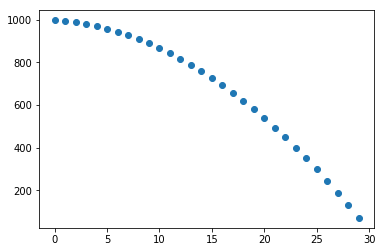

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(altitude,'o')

## Exercises

Recreate the graph on a planet where the acceleration due to gravity is a function of time. Specifically: gravity starts at -2.0 (ie, away from the planet's surface), and is reduced by 0.1 every second. If the lander starts at 1,000 meters, what is its (a) approximate maximum altitude and (b) time until impact?

*Important safety tip: since LunarLander.g is a **class variable**, any changes will be persistent; you may need to either (a) set the initial value of g when you run the simulation or (b) re-load the LunarLander class before each simulation.*

In [13]:
# here is a starting point... this is the lunar lander, with gravity reversed:

class LunarLander:                   
    
    g = -2.0     # hey! I am falling up!

    def __init__(self, mass = 120.0, fuel = 10.0, altitude = 0.0, velocity = 0.0):
        self.mass = mass     
        self.fuel = fuel
        self.altitude = altitude
        self.velocity = velocity
        self.destroyed = False
        
    def tick(self):
        self.velocity -= LunarLander.g
        self.altitude += self.velocity
        if (self.altitude < 0.0):
            self.altitude = 0.0
            if abs(self.velocity) > 2.0:
                self.destroyed = True
            self.velocity = 0.0
        return self.altitude